In [68]:
from matplotlib import pyplot as plt
import numpy 

data = numpy.load('2022_september_pro_cw.npy')

In [69]:
# Collinear: d == 0
# Clockwise turn: d > 0
# Counterclockwise turn: d < 0
def is_ccw(p2, p0, p1):
    return ((p1[0] - p0[0]) * (p2[1] - p0[1]) - (p2[0] - p0[0]) * (p1[1] - p0[1]));

In [77]:
x = []
y = []
x2 = []
y2 = []
x3 = []
y3 = []
for i in data:
    x2.append(i[0])
    x.append(i[2])
    x3.append(i[4])
    y2.append(i[1])
    y.append(i[3])
    y3.append(i[5])

In [81]:
speedx = []
speedy = []
speedxm = []
speedym = []
speedxs = []
speedys = []
turns = []
for i in range(len(x)):
    first = i % len(x)
    second = (i + 1) % len(x)
    third = (i + 2) % len(x)
    turn = is_ccw((x2[second],y2[second],),(x2[first],y2[first],),(x2[third],y2[third],))
    turns.append(abs(turn))
    if abs(turn) < 0.01:
        speedx.append(x2[first])
        speedy.append(y2[first])
    elif abs(turn) < 0.02:
        speedxm.append(x2[first])
        speedym.append(y2[first])
    else:
        speedxs.append(x2[first])
        speedys.append(y2[first])

In [82]:
max(turns)

0.06353993015979498

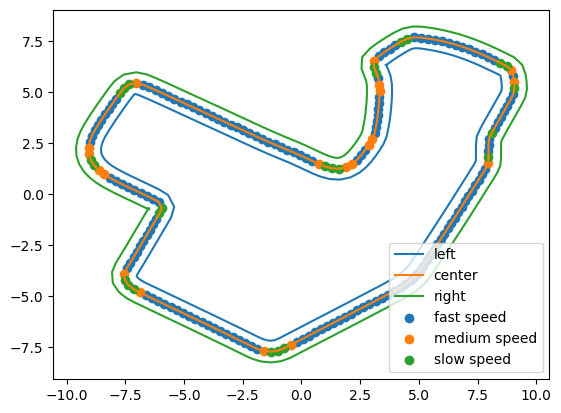

In [87]:
plt.plot(x, y,label="left")
plt.plot(x2, y2 ,label="center")
plt.plot(x3, y3 ,label="right")
plt.scatter(speedx,speedy,label="fast speed")
plt.scatter(speedxm,speedym,label="medium speed")
plt.scatter(speedxs,speedys,label="slow speed")
plt.legend()